# Visual exploratory data analysis (EDA)
In statistics, [exploratory data analysis (EDA)][1] is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA),[1] which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

[1]: https://en.wikipedia.org/wiki/Exploratory_data_analysis

### pandas line plots
In the previous chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance][1]. Your job is to plot the `'Month'` column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

[1]: http://finance.yahoo.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = '../_datasets/'
filename = 'monthly_stock_prices_2015.csv'

In [3]:
df = pd.read_csv(filepath+filename)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null object
AAPL     12 non-null float64
GOOG     12 non-null float64
IBM      12 non-null float64
dtypes: float64(3), object(1)
memory usage: 376.0+ bytes
None
             AAPL        GOOG         IBM
count   12.000000   12.000000   12.000000
mean   119.860835  607.954783  154.276666
std      7.563793   86.198682   11.988910
min    105.260002  520.510010  137.619995
25%    116.060003  536.635632  143.747501
50%    120.400002  583.411247  156.904999
75%    125.220002  646.909988  162.157505
max    130.279999  758.880005  171.289993


,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994


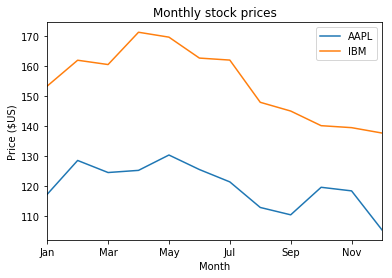

In [4]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL','IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### pandas scatter plots
Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the `x` and `y` parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository][1].

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized `'weight'` of each automobile in the dataset.

[1]: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [5]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/auto-mpg.csv'
df = pd.read_csv(urlDataSet)
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [6]:
sizes = [ 51.12044694,  56.78387977,  49.15557238,  49.06977358, 49.52823321,  78.4595872 ,  78.93021696,  77.41479205, 81.52541106,  61.71459825,  52.85646225,  54.23007578, 58.89427963,  39.65137852,  23.42587473,  33.41639502, 32.03903011,  27.8650165 ,  18.88972581,  14.0196956 ,  29.72619722,  24.58549713,  23.48516821,  20.77938954, 29.19459189,  88.67676838,  79.72987328,  79.94866084, 93.23005042,  18.88972581,  21.34122243,  20.6679223 , 28.88670381,  49.24144612,  46.14174741,  45.39631334, 45.01218186,  73.76057586,  82.96880195,  71.84547684, 69.85320595, 102.22421043,  93.78252358, 110.0, 36.52889673,  24.14234281,  44.84805372,  41.02504618, 20.51976563,  18.765772  ,  17.9095202 ,  17.75442285, 13.08832041,  10.83266174,  14.00441945,  15.91328975, 21.60597587,  18.8188451 ,  21.15311208,  24.14234281, 20.63083317,  76.05635059,  80.05816704,  71.18975117, 70.98330444,  56.13992036,  89.36985382,  84.38736544, 82.6716892 ,  81.4149056 ,  22.60363518,  63.06844313, 69.92143863,  76.76982089,  69.2066568 ,  35.81711267, 26.25184749,  36.94940537,  19.95069229,  23.88237331, 21.79608472,  26.1474042 ,  19.49759118,  18.36136808, 69.98970461,  56.13992036,  66.21810474,  68.02351436, 59.39644014, 102.10046481,  82.96880195,  79.25686195, 74.74521151,  93.34830013, 102.05923292,  60.7883734 , 40.55589449,  44.7388015 ,  36.11079464,  37.9986264 , 35.11233175,  15.83199594, 103.96451839, 100.21241654, 90.18186347,  84.27493641,  32.38645967,  21.62494928, 24.00218436,  23.56434276,  18.78345471,  22.21725537, 25.44271071,  21.36007926,  69.37650986,  76.19877818, 14.51292942,  19.38962134,  27.75740889,  34.24717407, 48.10262495,  29.459795  ,  32.80584831,  55.89556844, 40.06360581,  35.03982309,  46.33599903,  15.83199594, 25.01226779,  14.03498009,  26.90404245,  59.52231336, 54.92349014,  54.35035315,  71.39649768,  91.93424995, 82.70879915,  89.56285636,  75.45251972,  20.50128352, 16.04379287,  22.02531454,  11.32159874,  16.70430249, 18.80114574,  18.50153068,  21.00322336,  25.79385418, 23.80266582,  16.65430211,  44.35746794,  49.815853  , 49.04119063,  41.52318884,  90.72524338,  82.07906251, 84.23747672,  90.29816462,  63.55551901,  63.23059357, 57.92740995,  59.64831981,  38.45278922,  43.19643409, 41.81296121,  19.62393488,  28.99647648,  35.35456858, 27.97283229,  30.39744886,  20.57526193,  26.96758278, 37.07354237,  15.62160631,  42.92863291,  30.21771564, 36.40567571,  36.11079464,  29.70395123,  13.41514444, 25.27829944,  20.51976563,  27.54281821,  21.17188565, 20.18836167,  73.97101962,  73.09614831,  65.35749368, 73.97101962,  43.51889468,  46.80945169,  37.77255674, 39.6256851 ,  17.24230306,  19.49759118,  15.62160631, 13.41514444,  55.49963323,  53.18333207,  55.31736854, 42.44868923,  13.86730874,  16.48817545,  19.33574884, 27.3931002 ,  41.31307817,  64.63368105,  44.52069676, 35.74387954,  60.75655952,  79.87569835,  68.46177648, 62.35745431,  58.70651902,  17.41217694,  19.33574884, 13.86730874,  22.02531454,  15.75091031,  62.68013142, 68.63071356,  71.36201911,  76.80558184,  51.58836621, 48.84134317,  54.86301837,  51.73502816,  74.14661842, 72.22648148,  77.88228247,  78.24284811,  15.67003285, 31.25845963,  21.36007926,  31.60164234,  17.51450098, 17.92679488,  16.40542438,  19.96892459,  32.99310928, 28.14577056,  30.80379718,  16.40542438,  13.48998471, 16.40542438,  17.84050478,  13.48998471,  47.1451025 , 58.08281541,  53.06435374,  52.02897659,  41.44433489, 36.60292926,  30.80379718,  48.98404972,  42.90189859, 47.56635225,  39.24128299,  54.56115914,  48.41447259, 48.84134317,  49.41341845,  42.76835191,  69.30854366, 19.33574884,  27.28640858,  22.02531454,  20.70504474, 26.33555201,  31.37264569,  33.93740821,  24.08222494, 33.34566004,  41.05118927,  32.52595611,  48.41447259, 16.48817545,  18.97851406,  43.84255439,  37.22278157, 34.77459916,  44.38465193,  47.00510227,  61.39441929, 57.77221268,  65.12675249,  61.07507305,  79.14790534, 68.42801405,  54.10993164,  64.63368105,  15.42864956, 16.24054679,  15.26876826,  29.68171358,  51.88189829, 63.32798377,  42.36896092,  48.6988448 ,  20.15170555, 19.24612787,  16.98905358,  18.88972581,  29.68171358, 28.03762169,  30.35246559,  27.20120517,  19.13885751, 16.12562794,  18.71277385,  16.9722369 ,  29.85984799, 34.29495526,  37.54716158,  47.59450219,  19.93246832, 30.60028577,  26.90404245,  24.66650366,  21.36007926, 18.5366546 ,  32.64243213,  18.5366546 ,  18.09999962, 22.70075058,  36.23351603,  43.97776651,  14.24983724, 19.15671509,  14.17291518,  35.25757392,  24.38356372, 26.02234705,  21.83420642,  25.81458463,  28.90864169, 28.58044785,  30.91715052,  23.6833544 ,  12.82391671, 14.63757021,  12.89709155,  17.75442285,  16.24054679, 17.49742615,  16.40542438,  20.42743834,  17.41217694, 23.58415722,  19.96892459,  20.33531923,  22.99334585, 28.47146626,  28.90864169,  43.43816712,  41.57579979, 35.01567018,  35.74387954,  48.5565546 ,  57.77221268, 38.98605581,  49.98882458,  28.25412762,  29.01845599, 23.88237331,  27.60710798,  26.54539622,  31.14448175, 34.17556473,  16.3228815 ,  17.0732619 ,  16.15842026, 18.80114574,  18.80114574,  19.42557798,  20.2434083 , 20.98452475,  16.07650192,  16.07650192,  16.57113469, 36.11079464,  37.84783835,  27.82194848,  33.46359332, 29.5706502 ,  23.38638738,  36.23351603,  32.40968826, 18.88972581,  21.92965639,  28.68963762,  30.80379718]

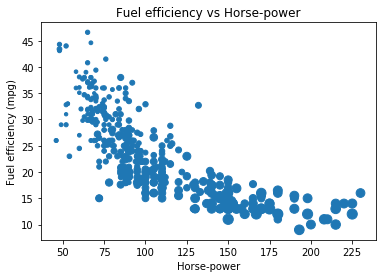

In [7]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same `x` and `y` axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate [box plots][1] for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify `subplots=True` inside `.plot()` to generate two separate plots.

[1]: https://en.wikipedia.org/wiki/Box_plot

            weight         mpg
count   392.000000  392.000000
mean   2977.584184   23.445918
std     849.402560    7.805007
min    1613.000000    9.000000
25%    2225.250000   17.000000
50%    2803.500000   22.750000
75%    3614.750000   29.000000
max    5140.000000   46.600000


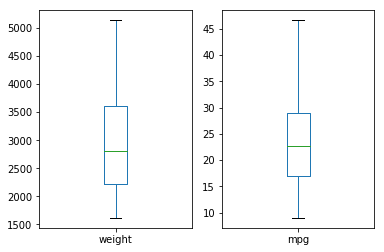

In [8]:
# Make a list of the column names to be plotted: cols
cols = ['weight','mpg']

# Generate the box plots
df[cols].plot(kind='box',subplots=True)

print(df[cols].describe())

# Display the plot
plt.show()

### pandas hist, pdf and cdf
Pandas relies on the `.hist()` method to not only generate histograms, but also plots of [probability density functions (PDFs)][1] and [cumulative density functions (CDFs)][2].

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the `Seaborn` package.

Your job is to plot a `PDF` and `CDF` for the fraction column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the `PDF`, you need to specify `normed=True` in your call to `.hist()`, and when plotting the `CDF`, you need to specify `cumulative=True` in addition to `normed=True`.

Histogram options
- bins (integer): number of intervals or bins
- range (tuple): extrema of bins (minimum, maximum)
- normed (boolean): whether to normalize to one
- cumulative (boolean): compute Cumulative Distribution Function (CDF)
- … more Matplotlib customizations

[1]: https://en.wikipedia.org/wiki/Probability_density_function
[2]: https://en.wikipedia.org/wiki/Cumulative_distribution_function

In [9]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/tips.csv'
df = pd.read_csv(urlDataSet)
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


C:\Users\mgatt\DataScience\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


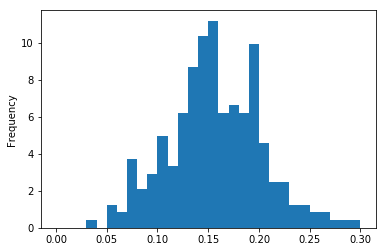

In [10]:
# Plot the PDF
df.fraction.plot(kind='hist', bins=30, normed=True, range=(0,.3))
plt.show()

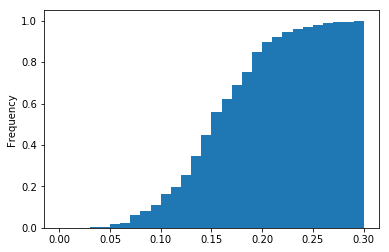

In [11]:
# Plot the CDF
df.fraction.plot(kind='hist', bins=30, normed=True, cumulative=True, range=(0,.3))
plt.show()

## Statistical exploratory data analysis 

### Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics][1].

Your job is to compute the minimum and maximum values of the `'Engineering'` column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the `.mean()` method with the keyword argument `axis='columns`. This computes the mean across all columns per row.

[1]: http://nces.ed.gov/programs/digest/2013menu_tables.asp

In [12]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/percent-bachelors-degrees-women-usa.csv'
df = pd.read_csv(urlDataSet, index_col='Year')
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


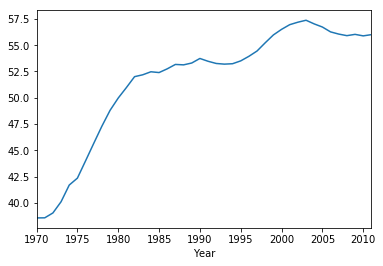

In [13]:
# Print the minimum value of the Engineering column
print(df['Engineering'].min())

# Print the maximum value of the Engineering column
print(df['Engineering'].max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### [Median vs mean][1]
In many data sets, **there can be large differences in the [mean and median][3] value due to the presence of outliers**.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University][2].

[![alt text](\_Docs\ejemplo-de-media-mediana-y-moda-6-638.jpg "Ejemplo de media, mediana y moda")][4]
___

[1]: https://es.khanacademy.org/math/probability/data-distributions-a1/summarizing-center-distributions/v/statistics-intro-mean-median-and-mode
[2]: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html
[3]: https://es.wikipedia.org/wiki/Medidas_de_tendencia_central
[4]: http://www.mat.uda.cl/hsalinas/cursos/2011/2do/clase2.pdf

In [14]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/titanic.csv'
df = pd.read_csv(urlDataSet)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64
median: 14.4542


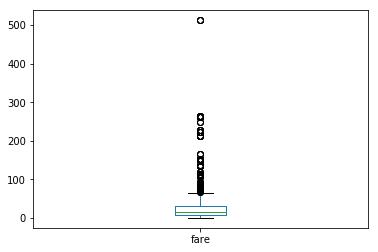

In [15]:
# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Print the median
print('median: '+str(df.fare.median()))

# Show the plot
plt.show()

In this example you can see why the median is a more informative statistic in the presence of outliers.

### Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from [Gapminder][1].

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

[1]: https://docs.google.com/a/continuum.io/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html#

In [16]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/life_expectancy_at_birth.csv'
df = pd.read_csv(urlDataSet)
df.head()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

      ...   2007   2008    2009    2010   2011    2012    2013   2014    2015  \
0.05  ...  53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87  57.855   
0.95  ...  80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00  82.100   

         2016  
0.05  59.2555  
0.95  82.1650  

[2 rows x 218 columns]


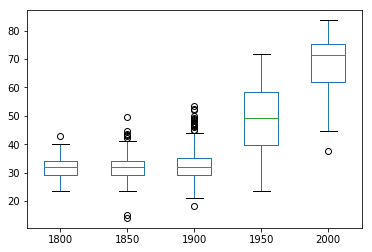

In [17]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05,0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

### Standard deviation of temperature
Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from [Weather Underground][1].

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

[1]: https://www.wunderground.com/history/

In [18]:
filename = 'temp.csv'
df = pd.read_csv(filepath+filename, parse_dates=True, index_col='Date')
df.tail()

,Temperature
Date,
2013-03-27,34
2013-03-28,37
2013-03-29,43
2013-03-30,43
2013-03-31,44


In [19]:
# Print the mean of the January and March data
print(df[df.index.month==1].mean(), df[df.index.month==3].mean())

# Print the standard deviation of the January and March data
print(df[df.index.month==1].std(), df[df.index.month==3].std())

Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


## Separating populations
### Filtering and counting
How many automobiles were manufactured in Asia in the automobile dataset? Use filtering and the `.count()` member method to determine the number of rows where the `'origin'` column has the value 'Asia'.

As an example, you can extract the rows that contain `'US'` as the country of origin using `df[df['origin'] == 'US']`.

In [20]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/auto-mpg.csv'
df = pd.read_csv(urlDataSet)
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [21]:
x = df[df.origin=='Asia'].origin.count()
print('In this dataset, '+str(x)+' automobiles were manufactured in Asia.')

In this dataset, 79 automobiles were manufactured in Asia.


### Separate and summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

In [22]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df.origin=='US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


### Separate and plot
Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the `'fare'` column and passenger class information is contained in the `'pclass'` column.

When you're done, notice the portions of the box plots that differ and those that are similar.

In [23]:
urlDataSet = 'https://assets.datacamp.com/production/course_1639/datasets/titanic.csv'
titanic = pd.read_csv(urlDataSet)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


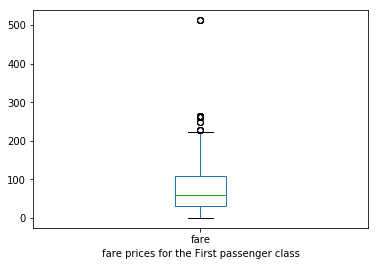

In [24]:
# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(y='fare', kind='box')

# Add the x-axis label
plt.xlabel('fare prices for the First passenger class')

# Display the plot
plt.show()

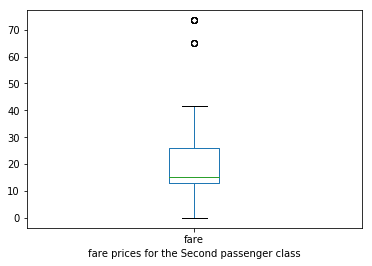

In [25]:
# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(y='fare', kind='box')

# Add the x-axis label
plt.xlabel('fare prices for the Second passenger class')

# Display the plot
plt.show()

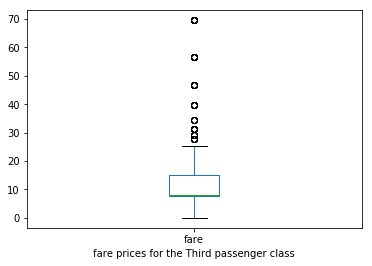

In [26]:
# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(y='fare', kind='box')

# Add the x-axis label
plt.xlabel('fare prices for the Third passenger class')

# Display the plot
plt.show()